# INF702 - Text Mining in Social Media


/xlsx ( folder)
Ontology_PreSNA.xlsx
ML_Super.xlsx
ML_Unsuper.xlsx
Emerging Technologies.xlsx

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd  # Importing Pandas

In [74]:
import os
outfolder = 'xlsx'
if(os.path.exists(outfolder)==False):
    os.makedirs(outfolder)
    
sns.set() # default set

sns.set_style("white")

target_label= 'Applications'
new_label = 'Application'


In [75]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Calibri'
sns.set(font_scale=1.5)
sns.set_palette(sns.color_palette("Greens"))

In [76]:
fname1 = 'datasets/References1.xlsx'
pdf1 = pd.read_excel(fname1)
pdf1.head(3)

#print(pdf1.info())


#pdf1['Year'] = pdf1['Year'].astype(int)

fname2 = 'datasets/References2.xlsx'
pdf2 = pd.read_excel(fname2)
pdf2.head(3)

#pdf2['Year'] = pdf2['Year'].astype(int)

#print(pdf2.info())

frames = [pdf1,pdf2]
allref=pd.concat(frames)

print(len(allref))
allref=allref.reset_index(drop=True)
print(len(allref))
#allref.index.droplevel(-1)

#print(allref.info())

allref.head(3)



265
265


C:\prj\anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Applications,Association,Authors,Authors2,CC,CF,CNN,Catefories,Challenges,Citation,...,Sources,Synthesis,TL,TM,TW,TYPE,Title,Year,keywords,week
0,NaN,ASTES,"Said A et al., 2017)","Said A, Mostafa , Azza Abdel & Khaled ,2017",NaN,NaN,NaN,w4p,NaN,"Said A. Salloum, Mostafa Al-Emran, Azza Abdel ...",...,ref,NaN,NaN,TM,TW,LR,A Survey of Text Mining in Social Media: Face...,2017.0,"Text Mining, Social Media, Facebook, Twitter",w1
1,NaN,NaN,Kwon et al .(2017),"Kwon, Kim & Park, 2017",NaN,NaN,NaN,w4p,NaN,"Kwon, H., Kim, J., & Park, Y. (2017). Applying...",...,ref,NaN,NaN,TM,NaN,R,Applying LSA text mining technique in envision...,2017.0,"Emerging Technology, Drone, Foresight, Future-...",w1
2,NaN,NaN,Kaur et al .(2017),"Kaur & Gupta, 2017",NaN,NaN,NaN,NaN,NaN,"Kaur, R., & Gupta, G. (2017). RESEARCH PAPER O...",...,NaN,NaN,NaN,NaN,NaN,R,RESEARCH PAPER ON SENTIMENTAL ANALYSIS OF ONLI...,2017.0,"Sentimental Analysis, Opinion Mining, Frequent...",w1


In [77]:
#pdf = pdf.replace(r'\\n',' ', regex=True)
print(len(allref))
allref = allref.replace('\n',' ', regex=True)
allref.head(3)
print(len(allref))

265
265


In [78]:
print(len(allref))
allref= allref.dropna(axis=0, subset=['Sources'])
allref['Sources'].unique()
#allref.head(2)
print(len(allref))


265
131


In [79]:
allref['Year'] = allref['Year'].astype(object)




In [80]:
def trim_fraction(text):
    if '.0' in text:
        return text[:text.rfind('.0')]
    return text

In [81]:
allref['Year']= allref['Year'].astype(str).apply(trim_fraction)
#stat_pd=allref.join(s)
#stat_pd.info()
#application_df = pd.DataFrame()




In [82]:
def getTable1(query, alldf, QueryName, withFile):
    subdf=alldf.query(query)
    
    #print('getTable2 length', len(subdf))
    outdf = pd.DataFrame()
    
    outdf['Authors'] = subdf['Authors']
    
    
    outdf['keywords'] = subdf['keywords']
    outdf['Applications'] = subdf['Applications']
    outdf['Emerging Technologies'] = subdf['Emerging Technologies']
    outdf['ML'] = subdf['ML']
    outdf['Challenges'] = subdf['Challenges']
    outdf['Future Works'] = subdf['Future Works']
    outdf['Year'] = subdf['Year']

    
    #adf= application_df.drop_duplicates(keep='first')
    
    print('getTable2 length outdf', len(outdf))
    writer = pd.ExcelWriter(outfolder+'/'+QueryName+'.xlsx')
    outdf.to_excel(writer,'Sheet1')
    writer.save()
    
    return  outdf
#application_df.head(5)

In [83]:
def getTable2(query, alldf, QueryName, withFile):
    subdf=alldf.query(query)
    
    #print('getTable2 length', len(subdf))
    outdf = pd.DataFrame()
    
    outdf['Authors'] = subdf['Authors']
    
    
    outdf['keywords'] = subdf['keywords']
    outdf['Applications'] = subdf['Applications']
    outdf['Emerging Technologies'] = subdf['Emerging Technologies']
    outdf['ML'] = subdf['ML']
    outdf['Challenges'] = subdf['Challenges']
    outdf['Future Works'] = subdf['Future Works']
    outdf['Year'] = subdf['Year']

    
    #adf= application_df.drop_duplicates(keep='first')
    
    print('getTable2 length outdf', len(outdf))
    writer = pd.ExcelWriter(outfolder+'/'+ QueryName+'.xlsx')
    outdf.to_excel(writer,'Sheet1')
    writer.save()
    
    return  outdf
#application_df.head(5)

In [84]:
query = "ML=='Supervised learning'"
QueryName = "ML_Super"
retd = getTable2(query, allref, QueryName,True)


getTable2 length outdf 12


In [85]:
query = "ML=='Unsupervised learning'"
QueryName = "ML_Unsuper"
retd = getTable2(query, allref, QueryName,True)

getTable2 length outdf 17


In [86]:
query = "ML=='Semi-supervised learning'"
QueryName = "ML_Semi-super"
retd = getTable2(query, allref, QueryName,True)

getTable2 length outdf 2


In [87]:
query = "Ontology=='Text Analysis'"
QueryName = "OnTology_TA"
retd = getTable2(query, allref, QueryName,True)

getTable2 length outdf 9


In [88]:
query = "Ontology=='Text Analysis based on SA'"
QueryName = "Ontology_TA_SA"
retd = getTable2(query, allref, QueryName,True)



getTable2 length outdf 25


In [89]:
query = "Ontology=='Prediction based on TA'"
QueryName = "Ontology_PreTA"
retd = getTable2(query, allref, QueryName,True)

getTable2 length outdf 7


In [90]:
query = "Ontology=='Prediction based on SNA'"
QueryName = "Ontology_PreSNA"
retd = getTable2(query, allref, QueryName,True)

getTable2 length outdf 5


In [91]:
query = "Ontology=='Social Network Analysis'"
QueryName = "Ontology_SNA"
retd = getTable2(query, allref, QueryName,True)

getTable2 length outdf 11


In [92]:
df =allref
df['index'] = df['Title'].str.find('swarm') #, na = False)
#df.head()
query = "index !=-1"
QueryName = "01Title_swarm"
retd = getTable2(query, df, QueryName,True)

getTable2 length outdf 3


In [93]:
df =allref
df['index'] = df['Title'].str.find('Swarm') #, na = False)
#df.head()
query = "index !=-1"
QueryName = "02Title_Swarm"
retd = getTable2(query, df, QueryName,True)

getTable2 length outdf 6


In [94]:

df =allref
df['ndex'] = df['Title'].str.find('swarm') #, na = False)
#df.head()
query = "index !=-1"
QueryName = "03Keywords_swarm"
retd = getTable2(query, df, QueryName,True)

getTable2 length outdf 6


In [95]:
df =allref
df['index'] = df['Title'].str.find('Swarm') #, na = False)
#df.head()
query = "index !=-1"
QueryName = "04Keywords_Swarm"
retd = getTable2(query, df, QueryName,True)

getTable2 length outdf 6


In [96]:
df =allref
print(len(df))

#query = "Ontology=='Prediction based on SNA'"
#subdf=allref.query.substring(query)
df['index'] = df['Title'].str.find('swarm') #, na = False)
#df.head()
query = "index !=-1"
QueryName = "Title_swarm"
retd = getTable2(query, allref, QueryName,True)
#df['Index'] = lambda x: x.find('Super'), df['ML']
#print(len(df))
#print(df['Index'])

131
getTable2 length outdf 3


In [97]:
def getTable3(alldf):
    #subdf=alldf.query(query)
    subdf=alldf
    
    #print('getTable2 length', len(subdf))
    outdf = pd.DataFrame()
    
    outdf['Authors'] = subdf['Authors']      
    outdf['keywords'] = subdf['keywords']
    outdf['Applications'] = subdf['Applications']
    outdf['Emerging Technologies'] = subdf['Emerging Technologies']
    outdf['ML'] = subdf['ML']
    outdf['Challenges'] = subdf['Challenges']
    outdf['Future Works'] = subdf['Future Works']
    outdf['Year'] = subdf['Year']

    
    #adf= application_df.drop_duplicates(keep='first')
    
    #print('getTable2 length outdf', len(outdf))
    #writer = pd.ExcelWriter(QueryName+'.xlsx')
    #outdf.to_excel(writer,'Sheet1')
    #writer.save()
    
    return  outdf
#application_df.head(5)



In [98]:
df =allref
retd = getTable3(df)

df['index'] = df['Emerging Technologies'].isna()
#df['index']

In [99]:

#print(df.head(15))
query = "index == False"
QueryName = "Emerging Technologies"
print(len(df))
retd = getTable2(query, df, QueryName,True)
print(len(retd))
#print(retd.head(15))
#print(df['Emerging Technologies'][1])
#df['index'] = df['Emerging Technologies'].isna()
#df.head()
#query = "index !=-1"
#QueryName = "EmergingTechnology"
#retd = getTable1(query, allref, QueryName,True)

131
getTable2 length outdf 24
24


In [100]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [101]:
type(retd)


pandas.core.frame.DataFrame

In [102]:

#retd = retd.fillna('Text Analysis', regex=True)
# Start with one review:
text = retd.to_string()

#text
#text.to_string()
#print(type(text))t

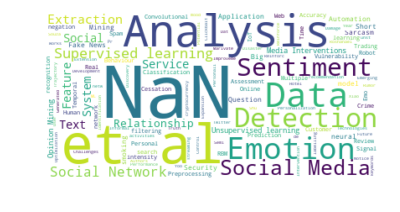

In [103]:

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color='white').generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()